In [183]:
import selenium
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import time
import pandas as pd


options = webdriver.ChromeOptions()

prefs = {'download.default_directory':'/home/verlo/dev_ws/EDA/data',
         'download.prompt_for_download':False}
options.add_experimental_option('prefs', prefs)

url = "https://www.imdb.com/"
driver = webdriver.Chrome(service=Service("../driver/chromedriver"),
                          options=options)
driver.get(url)

1.라이브러리 임포트(selenium, BeautifulSoup, time 시간 지연, pandas)
2.Chrome WebDriver 설정(options, prefs)
3.url의 웹사이트로 크롤링하기

In [184]:
driver.maximize_window()
driver.get(url)

창 확대하기

In [187]:
from selenium.webdriver.common.by import By

search_btn = driver.find_element(By.XPATH, '''//*[@id="suggestion-search"]''')
search_btn.click()

검색 창 선택하기

In [188]:
from selenium.webdriver.common.keys import Keys

search_doc = driver.find_element(By.CSS_SELECTOR, "#suggestion-search")
search_doc.send_keys('The Big Bang Theory')

검색 창에 The Big Bang Theory 검색하기

In [189]:
search_doc.send_keys(Keys.ENTER)

엔터

In [190]:
search_btn = driver.find_element(By.CSS_SELECTOR, "#__next > main > div.ipc-page-content-container.ipc-page-content-container--full.sc-c2d23b21-0.jUDJkt > div.ipc-page-content-container.ipc-page-content-container--center > section > div > div.ipc-page-grid__item.ipc-page-grid__item--span-2 > section:nth-child(3) > div.sc-17bafbdb-2.iUyFfD > ul > li:nth-child(1) > div.ipc-metadata-list-summary-item__c > div > a")
search_btn.click()

The Big Bang Theory 결과 확인

In [191]:
driver.execute_script("window.scrollTo(0, 800)")

화면 내리기

In [192]:
search_btn = driver.find_element(By.CSS_SELECTOR, "#__next > main > div > section.ipc-page-background.ipc-page-background--base.sc-304f99f6-0.fSJiHR > div > section > div > div.sc-978e9339-1.ihWZgK.ipc-page-grid__item.ipc-page-grid__item--span-2 > section:nth-child(7) > div.ipc-title.ipc-title--base.ipc-title--section-title.ipc-title--on-textPrimary > a > h3 > span:nth-child(1)")
search_btn.click()

Episode 클릭!

In [193]:
from bs4 import BeautifulSoup
from tqdm import tqdm
import pandas as pd
import time
from selenium.webdriver.common.by import By

big = driver.find_element(By.XPATH, '//*[@id="__next"]/main/div/section/div/section/div/div[1]/section[2]/section[1]/div[2]/ul')
big_list = big.find_elements(By.TAG_NAME, 'a')
dra_names = [dra_name.get_attribute("value") for dra_name in big_list]
# 빈 리스트를 만들어 딕셔너리를 저장합니다.
data_list = []
for idx, v in tqdm(enumerate(dra_names, start=2)):
    dra_selector = f'//*[@id="__next"]/main/div/section/div/section/div/div[1]/section[2]/section[1]/div[2]/ul/a[{idx}]'
    driver.find_element(By.XPATH, dra_selector).click()
    time.sleep(2)
    # 수정된 부분: 페이지 번호에 관계없이 동일한 웹 요소를 선택
    tab = driver.find_element(By.XPATH, '''//*[@id="__next"]/main/div/section/div/section/div/div[1]/section[2]/section[2]''')
    seasons_list = tab.find_elements(By.TAG_NAME, "article")
    for i in range(len(seasons_list)):
        season = driver.find_elements(By.TAG_NAME, "article")[i]
        # season.text에 정보가 구조화되어 있다고 가정
        # 텍스트를 분할하고 각 season에 대한 딕셔너리를 만듭니다.
        info = season.text.split('\n')
        season_dict = {
        '제목': info[0],        # 제목이 첫 번째 요소라고 가정
        '상영일자': info[1],       # 평점이 두 번째 요소라고 가정
        '설명': info[2],       # 설명이 세 번째 요소라고 가정
        '평점': info[3]     # 상영일자가 네 번째 요소라고 가정
        }
        data_list.append(season_dict)
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    time.sleep(2)
    # 마지막 페이지에 도달하면 종료
    if idx > 12:
        break
driver.close()

0it [00:00, ?it/s]

11it [01:02,  5.67s/it]


BeautifulSoup 모듈로 데이터 추출

In [194]:
# 리스트의 딕셔너리를 사용하여 DataFrame을 생성합니다.
df = pd.DataFrame(data_list)
# DataFrame을 CSV 파일로 저장 (바탕화면에 저장하는 예시)
df.to_csv('../data/TheBigBangTheory.csv', encoding='utf-8')
# DataFrame 출력
df

,제목,상영일자,설명,평점
0,S2.E1 ∙ The Bad Fish Paradigm,"Mon, Sep 22, 2008",Leonard becomes concerned when his date with P...,8.2
1,S2.E2 ∙ The Codpiece Topology,"Mon, Sep 29, 2008",Sheldon is annoyed when Leonard turns to Lesli...,8.0
2,TOP-RATED,S2.E3 ∙ The Barbarian Sublimation,"Mon, Oct 6, 2008","Sheldon introduces Penny to online gaming, how..."
3,S2.E4 ∙ The Griffin Equivalency,"Mon, Oct 13, 2008",The guys struggle to cope with Raj's arrogance...,7.9
4,S2.E5 ∙ The Euclid Alternative,"Mon, Oct 20, 2008",Sheldon annoys the gang when Leonard can't dri...,8.3
...,...,...,...,...
258,S12.E21 ∙ The Plagiarism Schism,"Thu, May 2, 2019",Kripke has proof that Dr. Pemberton plagiarize...,7.2
259,S12.E22 ∙ The Maternal Conclusion,"Thu, May 9, 2019",Leonard is pleasantly surprised when Beverly c...,7.9
260,TOP-RATED,S12.E23 ∙ The Change Constant,"Thu, May 16, 2019",Sheldon and Amy await big news.
261,TOP-RATED,S12.E24 ∙ The Stockholm Syndrome,"Thu, May 16, 2019",Bernadette and Wolowitz leave their kids for t...


데이터 출력

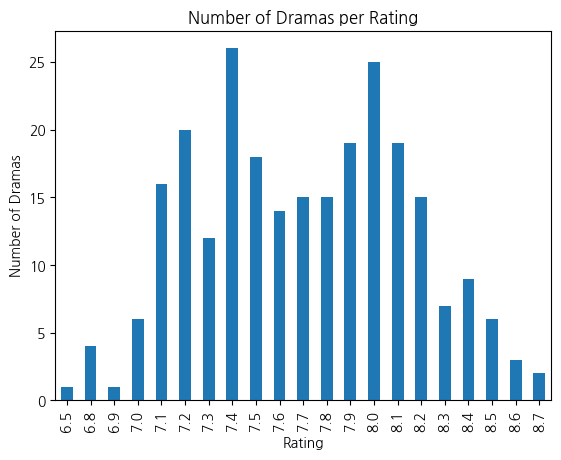

In [195]:
import matplotlib.pyplot as plt
# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
# 평점 데이터를 숫자로 변환합니다.
df['평점'] = pd.to_numeric(df['평점'], errors='coerce')
# 평점별로 데이터를 그룹화하고 이를 바 차트로 그립니다.
df['평점'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Dramas per Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Dramas')
plt.show()

그래프 시각화

In [196]:
import matplotlib.pyplot as plt

# 평점 데이터의 박스 플롯을 그립니다.
plt.boxplot(df['Number of Dramas Rating'], df['평점'])

plt.title('Number of Dramas per Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Dramas')

plt.show()

KeyError: 'Number of Dramas Rating'